In [16]:
# STEP 1: Install dependencies
!sudo apt install tesseract-ocr
!pip install pytesseract opencv-python-headless tensorflow matplotlib

import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [17]:
# Upload image
print("Upload an image with clear text (PNG, JPG, etc.)")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Upload an image with clear text (PNG, JPG, etc.)


Saving w.jpg to w (1).jpg


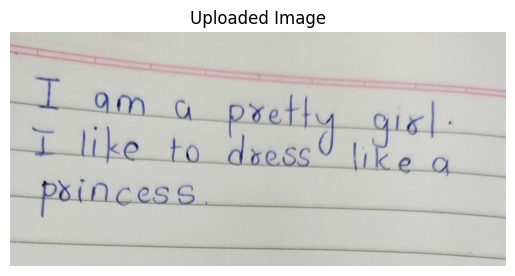

In [18]:
# Load image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Uploaded Image")
plt.axis("off")
plt.show()

In [19]:
# --- STEP 1: Try OCR on raw image
raw_text = pytesseract.image_to_string(img_rgb, lang="eng")
print("🔎 Raw OCR Output:\n", raw_text)

🔎 Raw OCR Output:
  



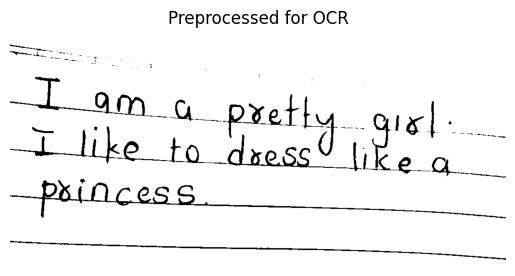

🔎 OCR after Preprocessing:
 Tam. a. So Am- 8 prety. reed ee

eh



In [20]:
# --- STEP 2: Preprocess (Grayscale + Threshold)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
                       cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

plt.imshow(thresh, cmap='gray')
plt.title("Preprocessed for OCR")
plt.axis("off")
plt.show()

proc_text = pytesseract.image_to_string(thresh, lang="eng")
print("🔎 OCR after Preprocessing:\n", proc_text)


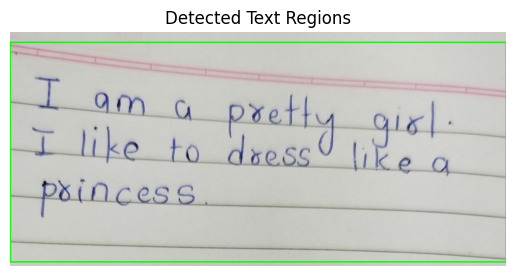

In [21]:
# --- STEP 3: Draw bounding boxes
h, w, _ = img.shape
boxes = pytesseract.image_to_boxes(img_rgb)
for b in boxes.splitlines():
    b = b.split()
    x, y, x2, y2 = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    cv2.rectangle(img_rgb, (x, h-y2), (x2, h-y), (0,255,0), 2)

plt.imshow(img_rgb)
plt.title("Detected Text Regions")
plt.axis("off")
plt.show()
